In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dfCardio = pd.read_csv('cardio_train.csv', sep=';')
dfCardio

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
dfCardio = dfCardio.set_index('id')
dfCardio

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
988,22469,1,155,69.0,130,80,2,2,0,0,1,0
989,14648,1,163,71.0,110,70,1,1,0,0,1,1
990,21901,1,165,70.0,120,80,1,1,0,0,1,0
991,14549,2,165,85.0,120,80,1,1,1,1,1,0
992,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1


# Data Cleanning

## Null Data

In [4]:
dfCardio[dfCardio.isnull().T.any()]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,


## Excluindo instâncias com ap_hi < 90 ou > 300 ou ap_lo < 0 ou ap_lo > 300 

In [5]:
dfCardio = dfCardio.drop(dfCardio[(dfCardio.ap_hi < 90) | (dfCardio.ap_hi > 300) | (dfCardio.ap_lo < 0) | (dfCardio.ap_lo > 300)].index, axis=0)
dfCardio

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
988,22469,1,155,69.0,130,80,2,2,0,0,1,0
989,14648,1,163,71.0,110,70,1,1,0,0,1,1
990,21901,1,165,70.0,120,80,1,1,0,0,1,0
991,14549,2,165,85.0,120,80,1,1,1,1,1,0
992,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1


## Excluir instâncias na qual o valor de ap_hi é menor ou igual a ap_lo

In [6]:
dfCardio = dfCardio.drop(dfCardio[dfCardio.ap_hi <= dfCardio.ap_lo].index, axis=0)
dfCardio

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
988,22469,1,155,69.0,130,80,2,2,0,0,1,0
989,14648,1,163,71.0,110,70,1,1,0,0,1,1
990,21901,1,165,70.0,120,80,1,1,0,0,1,0
991,14549,2,165,85.0,120,80,1,1,1,1,1,0
992,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1


# Feature Engineering

## Idade

In [7]:
dfCardio['age'] = dfCardio['age'] / 365
dfCardio = dfCardio.astype({'age': 'int32'})
dfCardio

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
988,61,1,155,69.0,130,80,2,2,0,0,1,0
989,40,1,163,71.0,110,70,1,1,0,0,1,1
990,60,1,165,70.0,120,80,1,1,0,0,1,0
991,39,2,165,85.0,120,80,1,1,1,1,1,0
992,64,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,52,2,168,76.0,120,80,1,1,1,0,1,0
99995,61,1,158,126.0,140,90,2,2,0,0,1,1
99996,52,2,183,105.0,180,90,3,1,0,1,0,1


In [8]:
dfCardio['f_age'] =  None
dfCardio.loc[dfCardio.age < 10, 'f_age'] = 'criança'
dfCardio.loc[(dfCardio.age >= 10) & (dfCardio.age < 20), 'f_age'] = 'adolescente'
dfCardio.loc[(dfCardio.age >= 20) & (dfCardio.age < 60), 'f_age'] = 'adulto'
dfCardio.loc[dfCardio.age >= 60, 'f_age'] = 'idoso'
dfCardio = dfCardio.drop('age', axis=1)
dfCardio

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,f_age
id,,,,,,,,,,,,
988,1,155,69.0,130,80,2,2,0,0,1,0,idoso
989,1,163,71.0,110,70,1,1,0,0,1,1,adulto
990,1,165,70.0,120,80,1,1,0,0,1,0,idoso
991,2,165,85.0,120,80,1,1,1,1,1,0,adulto
992,1,155,62.0,120,80,1,1,0,0,1,0,idoso
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,2,168,76.0,120,80,1,1,1,0,1,0,adulto
99995,1,158,126.0,140,90,2,2,0,0,1,1,idoso
99996,2,183,105.0,180,90,3,1,0,1,0,1,adulto


In [9]:
dfCardio['f_age'].isnull().sum()

0

## IMC

In [10]:
dfCardio['imc_rating'] = None
dfCardio.loc[round((dfCardio.weight / ((dfCardio.height / 100.0) * (dfCardio.height / 100.0))), 1) < 18.5, 'imc_rating'] = 'magreza'
dfCardio.loc[(round((dfCardio.weight / ((dfCardio.height / 100.0) * (dfCardio.height / 100.0))), 1) >= 18.5) & (round((dfCardio.weight / ((dfCardio.height / 100.0) * (dfCardio.height / 100.0))), 1) <= 24.9), 'imc_rating'] = 'normal'
dfCardio.loc[(round((dfCardio.weight / ((dfCardio.height / 100.0) * (dfCardio.height / 100.0))), 1) >= 25) & (round((dfCardio.weight / ((dfCardio.height / 100.0) * (dfCardio.height / 100.0))), 1) <= 29.9), 'imc_rating'] = 'sobrepeso'
dfCardio.loc[(round((dfCardio.weight / ((dfCardio.height / 100.0) * (dfCardio.height / 100.0))), 1) >= 30) & (round((dfCardio.weight / ((dfCardio.height / 100.0) * (dfCardio.height / 100.0))), 1) <= 39.9), 'imc_rating'] = 'obesidade'
dfCardio.loc[round((dfCardio.weight / ((dfCardio.height / 100.0) * (dfCardio.height / 100.0))), 1) >= 40, 'imc_rating'] = 'obesidade_grave'
dfCardio = dfCardio.drop(['weight', 'height'], axis=1)
dfCardio

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,f_age,imc_rating
id,,,,,,,,,,,
988,1,130,80,2,2,0,0,1,0,idoso,sobrepeso
989,1,110,70,1,1,0,0,1,1,adulto,sobrepeso
990,1,120,80,1,1,0,0,1,0,idoso,sobrepeso
991,2,120,80,1,1,1,1,1,0,adulto,obesidade
992,1,120,80,1,1,0,0,1,0,idoso,sobrepeso
...,...,...,...,...,...,...,...,...,...,...,...
99993,2,120,80,1,1,1,0,1,0,adulto,sobrepeso
99995,1,140,90,2,2,0,0,1,1,idoso,obesidade_grave
99996,2,180,90,3,1,0,1,0,1,adulto,obesidade


In [11]:
dfCardio['imc_rating'].isnull().sum()

0

## Blood Pressure Stages

In [12]:
dfCardio['blood_pressure_stage'] = None
dfCardio.loc[(dfCardio.ap_hi < 120) & (dfCardio.ap_lo < 80), 'blood_pressure_stage'] = 'normal'
dfCardio.loc[((dfCardio.ap_hi >= 120) & (dfCardio.ap_lo <= 129)) & (dfCardio.ap_lo < 80), 'blood_pressure_stage'] = 'elevado'
dfCardio.loc[((dfCardio.ap_hi >= 130) & (dfCardio.ap_hi <= 139)) | ((dfCardio.ap_lo >= 80) & (dfCardio.ap_lo <= 89)), 'blood_pressure_stage'] = 'hipertensão_estágio_1'
dfCardio.loc[(dfCardio.ap_hi >= 140) | (dfCardio.ap_lo >= 90), 'blood_pressure_stage'] = 'hipertensão_estágio_2'
dfCardio.loc[(dfCardio.ap_hi > 180) | (dfCardio.ap_lo > 120), 'blood_pressure_stage'] = 'hipertensão_estágio_1'
dfCardio = dfCardio.drop(['ap_hi', 'ap_lo'], axis=1)
dfCardio

,gender,cholesterol,gluc,smoke,alco,active,cardio,f_age,imc_rating,blood_pressure_stage
id,,,,,,,,,,
988,1,2,2,0,0,1,0,idoso,sobrepeso,hipertensão_estágio_1
989,1,1,1,0,0,1,1,adulto,sobrepeso,normal
990,1,1,1,0,0,1,0,idoso,sobrepeso,hipertensão_estágio_1
991,2,1,1,1,1,1,0,adulto,obesidade,hipertensão_estágio_1
992,1,1,1,0,0,1,0,idoso,sobrepeso,hipertensão_estágio_1
...,...,...,...,...,...,...,...,...,...,...
99993,2,1,1,1,0,1,0,adulto,sobrepeso,hipertensão_estágio_1
99995,1,2,2,0,0,1,1,idoso,obesidade_grave,hipertensão_estágio_2
99996,2,3,1,0,1,0,1,adulto,obesidade,hipertensão_estágio_2


In [13]:
dfCardio['blood_pressure_stage'].isnull().sum()

0

# Normalização

## Dados categóricos

In [14]:
dfCardio

,gender,cholesterol,gluc,smoke,alco,active,cardio,f_age,imc_rating,blood_pressure_stage
id,,,,,,,,,,
988,1,2,2,0,0,1,0,idoso,sobrepeso,hipertensão_estágio_1
989,1,1,1,0,0,1,1,adulto,sobrepeso,normal
990,1,1,1,0,0,1,0,idoso,sobrepeso,hipertensão_estágio_1
991,2,1,1,1,1,1,0,adulto,obesidade,hipertensão_estágio_1
992,1,1,1,0,0,1,0,idoso,sobrepeso,hipertensão_estágio_1
...,...,...,...,...,...,...,...,...,...,...
99993,2,1,1,1,0,1,0,adulto,sobrepeso,hipertensão_estágio_1
99995,1,2,2,0,0,1,1,idoso,obesidade_grave,hipertensão_estágio_2
99996,2,3,1,0,1,0,1,adulto,obesidade,hipertensão_estágio_2


In [15]:
col_cat = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'f_age', 'imc_rating', 'blood_pressure_stage']
dfCardioML_dummies = pd.get_dummies(dfCardio[col_cat].astype(str), drop_first=False)
dfCardioML_dummies

,gender_1,gender_2,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,smoke_0,smoke_1,...,f_age_idoso,imc_rating_magreza,imc_rating_normal,imc_rating_obesidade,imc_rating_obesidade_grave,imc_rating_sobrepeso,blood_pressure_stage_elevado,blood_pressure_stage_hipertensão_estágio_1,blood_pressure_stage_hipertensão_estágio_2,blood_pressure_stage_normal
id,,,,,,,,,,,,,,,,,,,,,
988,1,0,0,1,0,0,1,0,1,0,...,1,0,0,0,0,1,0,1,0,0
989,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
990,1,0,1,0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
991,0,1,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
992,1,0,1,0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,0,1,1,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
99995,1,0,0,1,0,0,1,0,1,0,...,1,0,0,0,1,0,0,0,1,0
99996,0,1,0,0,1,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [16]:
dfCardioML = pd.concat([dfCardio, dfCardioML_dummies], axis=1)
dfCardioML = dfCardioML.drop(col_cat, axis=1)
dfCardioML

,cardio,gender_1,gender_2,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,smoke_0,...,f_age_idoso,imc_rating_magreza,imc_rating_normal,imc_rating_obesidade,imc_rating_obesidade_grave,imc_rating_sobrepeso,blood_pressure_stage_elevado,blood_pressure_stage_hipertensão_estágio_1,blood_pressure_stage_hipertensão_estágio_2,blood_pressure_stage_normal
id,,,,,,,,,,,,,,,,,,,,,
988,0,1,0,0,1,0,0,1,0,1,...,1,0,0,0,0,1,0,1,0,0
989,1,1,0,1,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
990,0,1,0,1,0,0,1,0,0,1,...,1,0,0,0,0,1,0,1,0,0
991,0,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
992,0,1,0,1,0,0,1,0,0,1,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
99995,1,1,0,0,1,0,0,1,0,1,...,1,0,0,0,1,0,0,0,1,0
99996,1,0,1,0,0,1,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0


# Training and Testing Data

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Y = dfCardioML.cardio
X = dfCardioML.drop(['cardio'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

X_new = X.loc[[988, 989]]

# Decision Tree

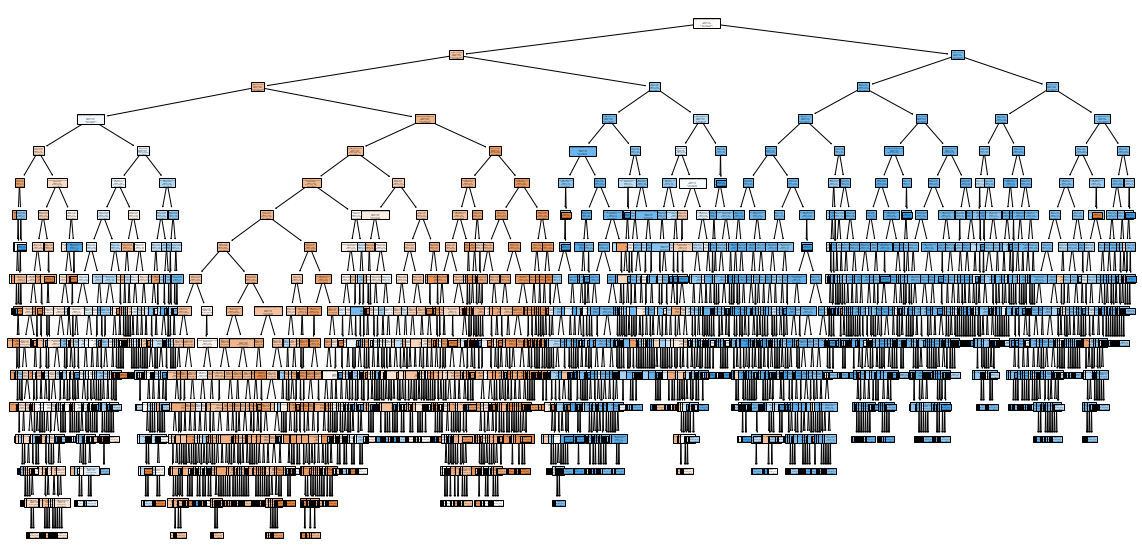

In [23]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree

model = DecisionTreeClassifier(criterion='entropy', max_depth=20)
model = model.fit(X_train, Y_train)

fig = plt.figure(figsize=(20, 10))
_ = tree.plot_tree(model, feature_names=X.columns, class_names=['targetNo', 'targetYes'], filled=True)

In [24]:
resultado = model.predict(X_test)
print('Accuracy_test: ', accuracy_score(Y_test, resultado))

resultado = model.predict(X_train)
print('Accuracy_train: ', accuracy_score(Y_train, resultado))

Accuracy_test:  0.7183637433784579
Accuracy_train:  0.7313125367863449
